
# Project: No Show Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#Model">Model</a></li>
</ul>

<a id='intro'></a>
## Introduction

>Missing appointment happens a lot and sometimes affect businesses that depend on appointments to complete the service such as Hospitals. In this project we will build a model based on our dataset to predict the probability of the patient to miss the appointment.

>The benefit of this model that the hospital could predict the probability of the patient to miss the appointment and then increase number of appointment for that day. 

#### Data Description:

>The dataset is provided by Kaggle and contains more than 100000+ records with 14 features here are some of important features:

- Gender
- AppointmentDay
- Neighborhood
- Scholarship
- Hypertension
- Diabetes
- Alcoholism
- Handcap
- SMS_received
- No-show

>we will see what is the relation between these features and NO_SHOW
 
>Dataset url: https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd2e9a_noshowappointments-kagglev2-may-2016/noshowappointments-kagglev2-may-2016.csv

#### Tools:
- Jupyter notebook 
- matplotlib
- Pandas
- Numpy
- sklearn

##### The questions that we have:
>>What is the percentage of patients who were attended versus those who didn't attend?

>>What is the average age of the patients who were attended versus those who didn't attend?

>>Is there a relation between patients with Diabetes and no show?

In [1]:
# import pandas , numpy and matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import csv
from datetime import datetime as dt
from collections import defaultdict
import matplotlib.pyplot as plt

# modeling imports
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, accuracy_score, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler



#import sys
#np.set_printoptions(threshold=sys.maxsize)


<a id='wrangling'></a>
## Data Wrangling



### General Properties

>Load dataset from CSV file

In [2]:
df = pd.read_csv('noshowappointments.csv')

>Number of samples in dataset

In [3]:
# this returns a tuple of the dimensions of the dataframe
df.shape

(110527, 14)

>Describe

In [4]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


>Check for the datatype and features with missing values


In [5]:
df.info()
# After checking AppointmentDay and ScheduledDay having wrong data type, however, these columns will not use them in the analysis
# Also there's no null values found

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


>Show first 5 rows

In [6]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


>Show first 5 rows

In [7]:
max(df['AppointmentDay']) , min(df['AppointmentDay'])

('2016-06-08T00:00:00Z', '2016-04-29T00:00:00Z')

>Appointment ID should be unique number
>> No Duplicate

In [8]:
sum(df['AppointmentID'].duplicated())

0

> Check if there any age less than or equal 0 

In [9]:
# Check if there any age <= 0
len(df[df['Age'] < 0])
# 3540 records having wrong age number

1

> Delete some columns because we'll not use them.

In [10]:
df.drop(['PatientId','AppointmentID'], axis = 1, inplace=True)

### Data Cleaning

>Rename some spelling errors in the columns

In [11]:
# rename No-show Handicap Hypertension Typo
df.rename(columns={'No-show':'No_show'}, inplace=True)
df.rename(columns={'Handcap':'Handicap'}, inplace=True)
df.rename(columns={'Hipertension':'Hypertension'}, inplace=True)

In [12]:
# Some records having Zero in Age column witch is wrong
len(df[df.Age < 0])

1

In [13]:
#remove all records with less than 0 from Dataframe
df = df[(df.Age >= 0)]

>Change No_Show column from 'Yes' = 1 & 'No' = 0 & change the data type
>>And Data type to numeric

In [14]:
# Change No_Show column from 'Yes' = 1 & 'No' = 0
df['No_show'] = df['No_show'].apply(lambda x: 0 if x=='No' else 1)
# Change Data type to numaric 
df['No_show'] = pd.to_numeric(df['No_show'])


###### Extract new features from appointment day column if the day is weekend or weekday that could help us later with calcification

In [15]:
df['AppointmentDay']= pd.to_datetime(df['AppointmentDay'])
df['ScheduledDay']= pd.to_datetime(df['ScheduledDay'])

In [16]:
df['Weekday'] = df.AppointmentDay.dt.dayofweek

In [17]:
df['Weekend'] = np.where(df.AppointmentDay.dt.dayofweek.isin([5,6]), 1, 0)

In [18]:
weekends = df[df['Weekend']==1]
workdays = df[df['Weekday']!=1]

In [19]:
weekends.Weekday.value_counts()

5    39
Name: Weekday, dtype: int64

In [20]:
workdays.Weekend.value_counts()

0    84847
1       39
Name: Weekend, dtype: int64

In [21]:
df['Weekday'] = np.where(df.AppointmentDay.dt.dayofweek.isin([0,1,2,3,4]), 1, 0)
df.Weekday.value_counts()

1    110487
0        39
Name: Weekday, dtype: int64

>From the data, we can see that the hospital opens 6 days a week

###### Extract new features to see if there a relation between appointment day and Scheduled day and no show

In [22]:
df['Number_of_days'] = (df['ScheduledDay'] - df['AppointmentDay']).dt.days

df['Number_of_days'] = df['Number_of_days'].abs()

#### Categorize age column

In [23]:
bins= [0,2,4,13,20, 125]
labels = ['Infant','Toddler','Kid','Teen', 'Adult']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

#df1 = df.head(5)
#df1.to_excel('filename.xlsx')

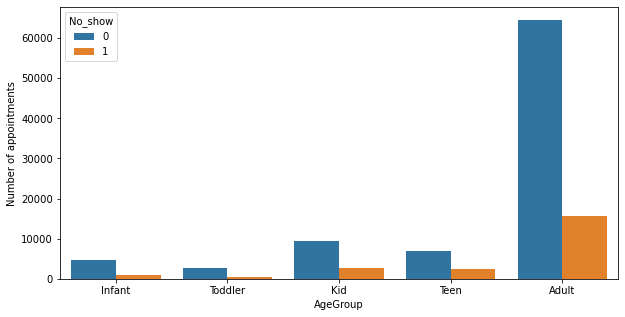

In [24]:
#Display bar chart to show use types and number of trips during the weekdays
plt.figure(figsize = [10, 5])
sns.countplot(data = df, x = 'AgeGroup', hue = 'No_show');
#plt.title('User type vs Days of the week', size = 15);
plt.xlabel('AgeGroup');
plt.ylabel('Number of appointments');

In [25]:
# Remove timezone from columns
#df['ScheduledDay'] = df['ScheduledDay'].dt.tz_localize(None)
#df['AppointmentDay'] = df['AppointmentDay'].dt.tz_localize(None)
# Export to excel
#df1 = df.head(10)
#df1.to_excel('filename.xlsx')

In [26]:
#sns.catplot(x=f.index, y="Neighbourhood", hue="No_show", kind="swarm", data=df)

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 (What is the percentage of patients who attended versus those who didn't attend?)

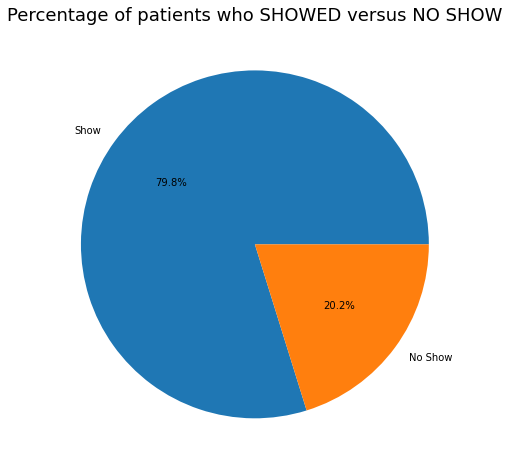

In [27]:
plt.figure(figsize=(15,8))
values = df['No_show'].value_counts()
labels = ['Show', 'No Show'] 
plt.pie(values, labels=labels, autopct='%.1f%%');
plt.title('Percentage of patients who SHOWED versus NO SHOW' , fontsize=18)
plt.show()

>This figure shows that 79.7% of patients make it to their appointment and 20.3% didn't.

### Research Question 2  (What is the average age of the patients who were attended versus those who didn't attend? )

>To answer this question, First we need to create two data frames, One with showed patients and other with no show patients.

In [28]:
#Create two Datafarme 
df_showed  = df[(df['No_show'] == 0)]
df_no_show = df[(df['No_show'] == 1)]
# 85307 showed 
# 21680 No Show 

> Now we will look at the relation between Age and No Show patients

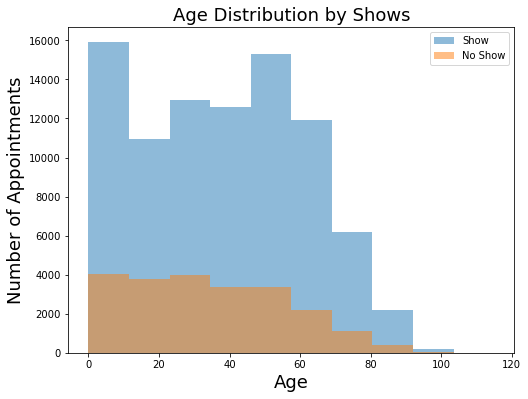

In [29]:
fig , ax = plt.subplots(figsize=(8, 6))
ax.hist(df_showed['Age'],alpha = 0.5, label = "Show");
ax.hist(df_no_show['Age'],alpha = 0.5, label = "No Show");
plt.title('Age Distribution by Shows',fontsize=18)
plt.xlabel('Age' ,fontsize=18)
plt.ylabel('Number of Appointments',fontsize=18);
plt.legend()

>This histogram shows Visual distribution of age for Showed & No Show patients 

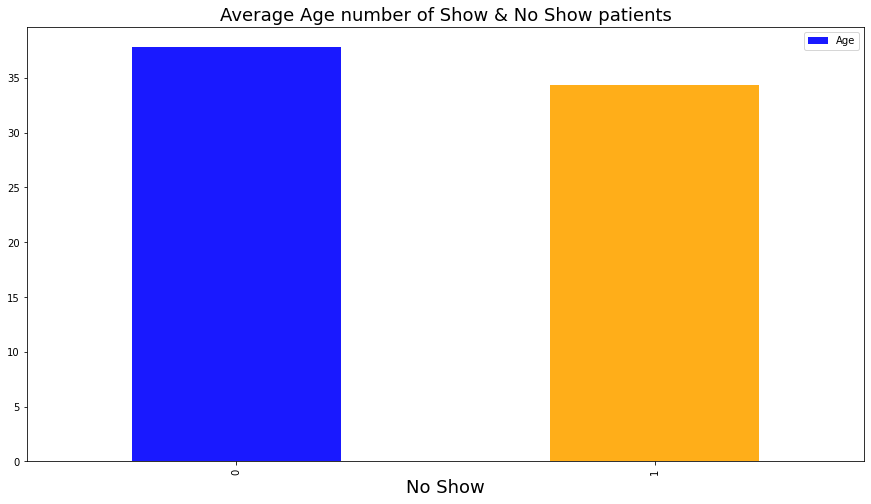

In [30]:
df.groupby('No_show')['Age'].mean().plot(kind='bar',color=['blue','orange'],alpha = .9,figsize=(15,8))
plt.xlabel('No Show' , fontsize=18)
plt.title('Average Age number of Show & No Show patients',fontsize=18)
plt.legend()

>We can see that from the graph the patients with older age have high chance to show up in the appointment.

The relation between Age, Gender and No show

<AxesSubplot:xlabel='No_show', ylabel='Gender'>

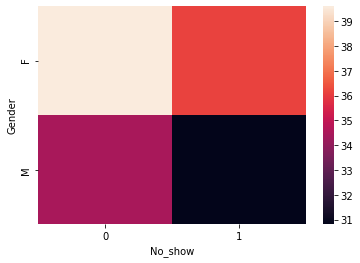

In [31]:
# pandas pivot
heatmap1_data = pd.pivot_table(df, values='Age', 
                     index=['Gender'], 
                     columns='No_show')
sns.heatmap(heatmap1_data)

 >We can see that from heatmap the No show males having an average age of 33, on the other hand, no show females having an average age of 37.

### Research Question 3  (Is there a relation between patients with Diabetes and no show?)

In [32]:
#Create two Datafarme 
# 1 -patients with diabetes and showed
# 2 -patients with diabetes and no showed
df_showed_Diabetes  = df_showed[(df_showed['Diabetes'] == 1)]
df_no_show_Diabetes = df_no_show[(df_no_show['Diabetes'] == 1)]

In [33]:
len(df_no_show_Diabetes)/len(df_showed_Diabetes)*100

21.956087824351297

In [34]:
len(df_showed_Diabetes)+len(df_no_show_Diabetes)

7943

>Perform a stacked bar graph with percentage & using group by function

In [35]:
F_Serie = df.groupby('Diabetes')['No_show'].value_counts()[0]
M_Serie = df.groupby('Diabetes')['No_show'].value_counts()[1]
M_Serie = M_Serie*(100/M_Serie.sum())
F_Serie = F_Serie*(100/F_Serie.sum())

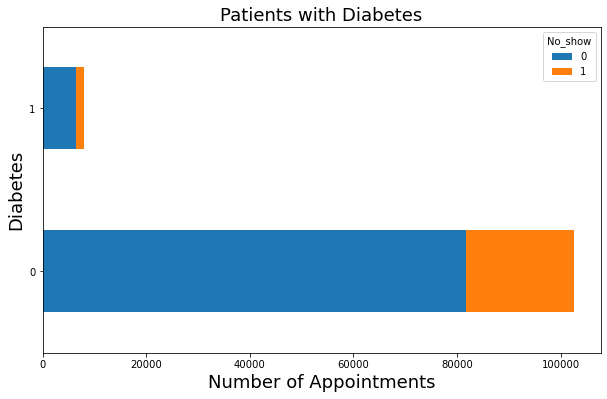

In [36]:
df2 = pd.DataFrame(np.array([list(F_Serie), list(M_Serie)]), index = [0, 1], columns = [0, 1])

ax = df.groupby('Diabetes')['No_show'].value_counts().unstack(level=1).plot.barh(stacked=True, figsize=(10, 6))
plt.title('Patients with Diabetes',fontsize=18)
plt.xlabel('Number of Appointments',fontsize=18);
plt.ylabel('Diabetes',fontsize=18);

>The graph shows that the patients with diabetes are more likley to make it to their appointment. that means patients with diabetes have a high chance to attend their appointment.

We can see that number of no show patients with diabetes very less compared to other patients without diabetes.

### Research Question 4  (Is there a relation between Number of days btween AppointmentDay ,  ScheduledDay and no show?)

In [37]:
df['Day']   = pd.DatetimeIndex(df['AppointmentDay']).day_name()

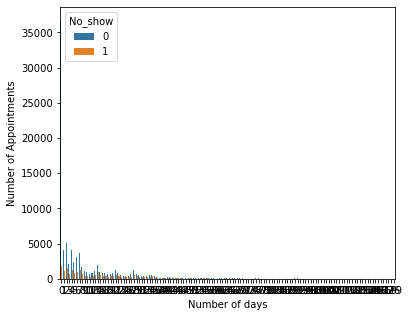

In [38]:
#Display bar chart to show use types and number of trips during the weekdays
plt.figure(figsize = [6,5])
sns.countplot(data = df, x = df.Number_of_days, hue = 'No_show');
plt.xlabel('Number of days');
plt.ylabel('Number of Appointments');

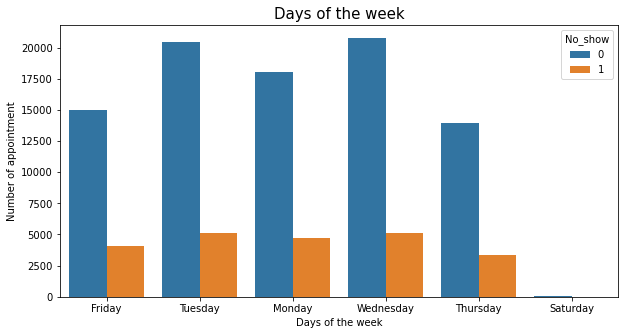

In [39]:
#Display bar chart to show use types and number of trips during the weekdays
plt.figure(figsize = [10, 5])
sns.countplot(data = df, x = 'Day', hue = 'No_show');
plt.title('Days of the week', size = 15);
plt.xlabel('Days of the week');
plt.ylabel('Number of appointment');

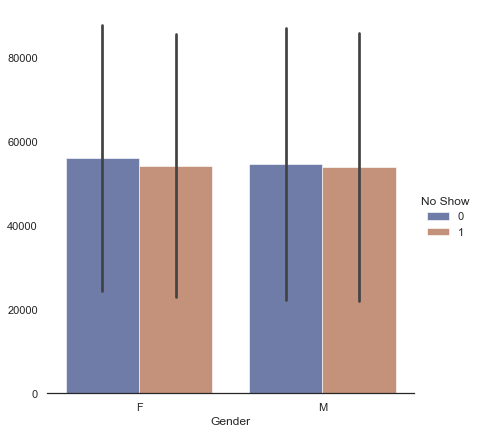

In [40]:
sns.set_theme(style="white")

penguins = df

# Draw a nested barplot by species and sex
g = sns.catplot(
    data=penguins, kind="bar",
    x="Gender",  y = df.index, hue="No_show",
    ci="sd", palette="dark", alpha=.6, height=6
)
g.despine(left=True)
g.set_axis_labels("Gender")
g.legend.set_title("No Show")

<AxesSubplot:xlabel='Age'>

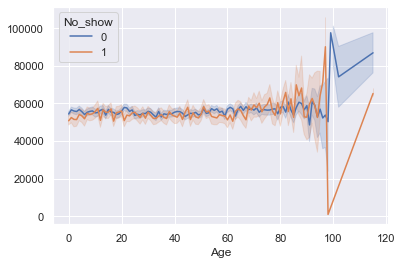

In [41]:
sns.set_theme(style="darkgrid")

# Load an example dataset with long-form data
fmri = df

# Plot the responses for different events and regions
sns.lineplot(x="Age", y=fmri.index,
             hue="No_show",
             data=fmri)

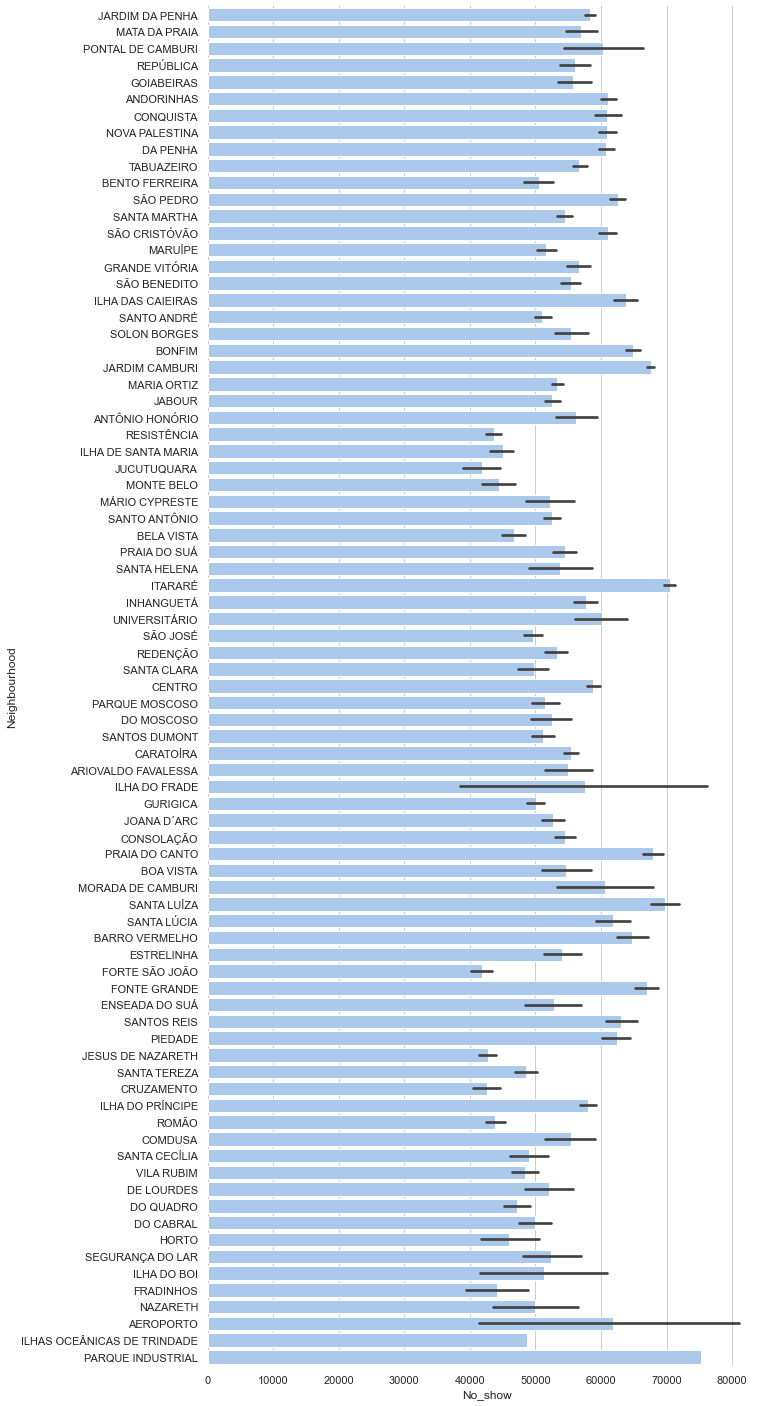

In [42]:
# Initialize the matplotlib figure

sns.set_theme(style="whitegrid")

f, ax = plt.subplots(figsize=(10, 25))

# Load the example car crash dataset
#crashes = sns.load_dataset("car_crashes").sort_values("total", ascending=False)
crashes = df
# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(x = df.index , y="Neighbourhood", data=crashes,
            label="Total", color="b")

# Plot the crashes where alcohol was involved
sns.set_color_codes("muted")
sns.barplot(x="No_show", y="Neighbourhood", data=crashes,
            label="Alcohol-involved", color="r")

# Add a legend and informative axis label
#ax.legend(ncol=2, loc="lower right", frameon=True)
#ax.set(xlim=(0, 24), ylabel="",
#       xlabel="Automobile collisions per billion miles")
sns.despine(left=True, bottom=True)

<a id='Model'></a>
## Model

Since most of the features are binary so we will use logistic regression binary classification and check the result

In [43]:
test = df

In [44]:
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show,Weekday,Weekend,Number_of_days,AgeGroup,Day
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,0,1,0,0,Adult,Friday
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,0,1,0,0,Adult,Friday
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,0,1,0,0,Adult,Friday
3,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,1,0,0,Kid,Friday
4,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,0,1,0,0,Adult,Friday


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 17 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   Gender          110526 non-null  object             
 1   ScheduledDay    110526 non-null  datetime64[ns, UTC]
 2   AppointmentDay  110526 non-null  datetime64[ns, UTC]
 3   Age             110526 non-null  int64              
 4   Neighbourhood   110526 non-null  object             
 5   Scholarship     110526 non-null  int64              
 6   Hypertension    110526 non-null  int64              
 7   Diabetes        110526 non-null  int64              
 8   Alcoholism      110526 non-null  int64              
 9   Handicap        110526 non-null  int64              
 10  SMS_received    110526 non-null  int64              
 11  No_show         110526 non-null  int64              
 12  Weekday         110526 non-null  int32              
 13  Weekend       

In [46]:
df2 = test.join(pd.get_dummies(test.pop('Gender')))
df2 = df2.join(pd.get_dummies(df2.pop('AgeGroup')))
df2 = df2.join(pd.get_dummies(df2.pop('Day')))

In [47]:
df2.drop(['Neighbourhood','ScheduledDay','AppointmentDay','Age','Number_of_days','Weekday','Weekend','No_show'], axis = 1, inplace=True)

In [48]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 19 columns):
 #   Column        Non-Null Count   Dtype
---  ------        --------------   -----
 0   Scholarship   110526 non-null  int64
 1   Hypertension  110526 non-null  int64
 2   Diabetes      110526 non-null  int64
 3   Alcoholism    110526 non-null  int64
 4   Handicap      110526 non-null  int64
 5   SMS_received  110526 non-null  int64
 6   F             110526 non-null  uint8
 7   M             110526 non-null  uint8
 8   Infant        110526 non-null  uint8
 9   Toddler       110526 non-null  uint8
 10  Kid           110526 non-null  uint8
 11  Teen          110526 non-null  uint8
 12  Adult         110526 non-null  uint8
 13  Friday        110526 non-null  uint8
 14  Monday        110526 non-null  uint8
 15  Saturday      110526 non-null  uint8
 16  Thursday      110526 non-null  uint8
 17  Tuesday       110526 non-null  uint8
 18  Wednesday     110526 non-null  uint8
dtypes:

In [49]:
#from sklearn.preprocessing import MultiLabelBinarizer

#mlb = MultiLabelBinarizer()

#df1 = df.join(pd.DataFrame(mlb.fit_transform(df.pop('Neighbourhood')),
#                          columns=mlb.classes_,
#                          index=df.index))

In [50]:
#df1 

In [51]:
mask = ['Scholarship','Hypertension','Diabetes','Alcoholism','Handicap','SMS_received','Weekday','Weekend','F','M']
X = df2#[mask] # Features
y = df.No_show # Target variable

In [52]:
X.head()

,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,F,M,Infant,Toddler,Kid,Teen,Adult,Friday,Monday,Saturday,Thursday,Tuesday,Wednesday
0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0
4,0,1,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0


Split the test data by 20% percent

In [53]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [54]:
# instantiate the model (using the default parameters)
model = LogisticRegression()

# fit the model with data
model.fit(X_train,y_train)

model.score(X_test,y_test)

0.8010947254139148

In [55]:
model.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [56]:
from sklearn import preprocessing

In [57]:
df.head()

,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show,Weekday,Weekend,Number_of_days,AgeGroup,Day
0,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,0,1,0,0,Adult,Friday
1,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,0,1,0,0,Adult,Friday
2,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,0,1,0,0,Adult,Friday
3,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,1,0,0,Kid,Friday
4,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,0,1,0,0,Adult,Friday


In [58]:
le_Neighbourhood = preprocessing.LabelEncoder()
le_AgeGroup = preprocessing.LabelEncoder()

In [59]:
df['Neighbourhood_n'] = le_Neighbourhood.fit_transform(df['Neighbourhood'])
df['AgeGroup_n'] = le_Neighbourhood.fit_transform(df['AgeGroup'])
df['Weekday_n'] = df.AppointmentDay.dt.dayofweek

In [60]:
df.head()

,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show,Weekday,Weekend,Number_of_days,AgeGroup,Day,Neighbourhood_n,AgeGroup_n,Weekday_n
0,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,0,1,0,0,Adult,Friday,39,0,4
1,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,0,1,0,0,Adult,Friday,39,0,4
2,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,0,1,0,0,Adult,Friday,45,0,4
3,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,1,0,0,Kid,Friday,54,2,4
4,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,0,1,0,0,Adult,Friday,39,0,4


In [61]:
mask = ['Scholarship','Hypertension','Diabetes','Alcoholism',
        'Handicap','SMS_received','Neighbourhood_n','AgeGroup_n','Weekday_n']

input_n = df[mask]

In [62]:
dfx = input_n.head(5)
dfx.to_excel('filename.xlsx')

In [63]:
input_n.head()

,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,Neighbourhood_n,AgeGroup_n,Weekday_n
0,0,1,0,0,0,0,39,0,4
1,0,0,0,0,0,0,39,0,4
2,0,0,0,0,0,0,45,0,4
3,0,0,0,0,0,0,54,2,4
4,0,1,1,0,0,0,39,0,4


In [64]:
from sklearn import tree

In [65]:
model = tree.DecisionTreeClassifier()

In [66]:
model.fit(input_n,y)

DecisionTreeClassifier()

In [67]:
model.score(input_n,y)

0.8111756509780504

<a id='conclusions'></a>
## Conclusions

In conclusion, about 20.3% of patients didn't make it to their appointment furthermore, after the investigation we can see that the patients with older age have a high chance to show up in their appointment than younger age patients. In addition, about 82% of patients with diabetes did show up in their appointment meaning patients with diabetes are likely to show up in their appointment.

After doing the logistic regression classification we got 79 scores after exploring the predicted data. 

It seems that our model is always predicting that the patient will attend the appointment. In the next step, we will try different classification algorithms and see which one is the accurate one.

And looking for other features such as weather conditions, Holidays, the difference between the scheduled day and the appointment day, etc...

## Limitation
- Some records in the dataset having 0 Age
- we can add more forecast factors like weather and temperature 
- We can add some social factors such as marital status and employment status